In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
jobData = pd.read_csv("/data/workspace_files/cleaned_data.csv")

In [3]:
jobData.shape

(17880, 312)

In [4]:
y = pd.DataFrame(jobData['fraudulent'])
to_drop = ['job_id', 'title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function', 'country_code', 'fraudulent', 'lemmatized_documents']
X = jobData.copy()
X.drop(to_drop, axis = 1, inplace = True)

In [5]:
y.value_counts()

In [6]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

---

# SVM Model

[link](https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python)

In [10]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf', gamma=0.96) #

#Train the model using the training sets
clf.fit(X_train, y_train.values.ravel())

#Predict the response for test dataset
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [11]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_train, y_train_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.9946468520294024
Accuracy: 0.9740865026099925


Train Data F1 score:	 0.9448559670781893
Test Data F1 score:	 0.6666666666666669


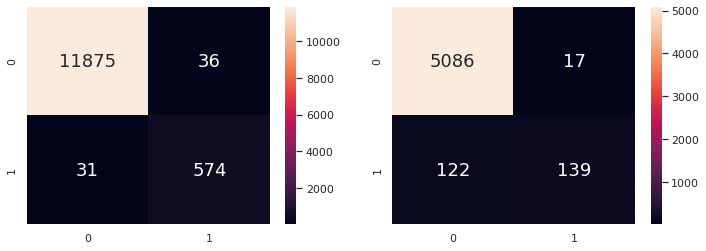

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

print("Train Data F1 score:\t", f1_score(y_train, y_train_pred))
print("Test Data F1 score:\t", f1_score(y_test, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

---

# Decision tree model

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9967241930329178
F1 score:	 0.9663105998356614

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9819164802386279
F1 score:	 0.8071570576540756



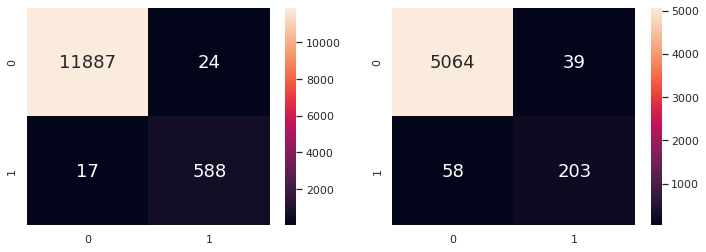

In [13]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeClassifier()  # create the decision tree object
dectree.fit(X_train, y_train)       # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print("F1 score:\t", f1_score(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print("F1 score:\t", f1_score(y_test, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

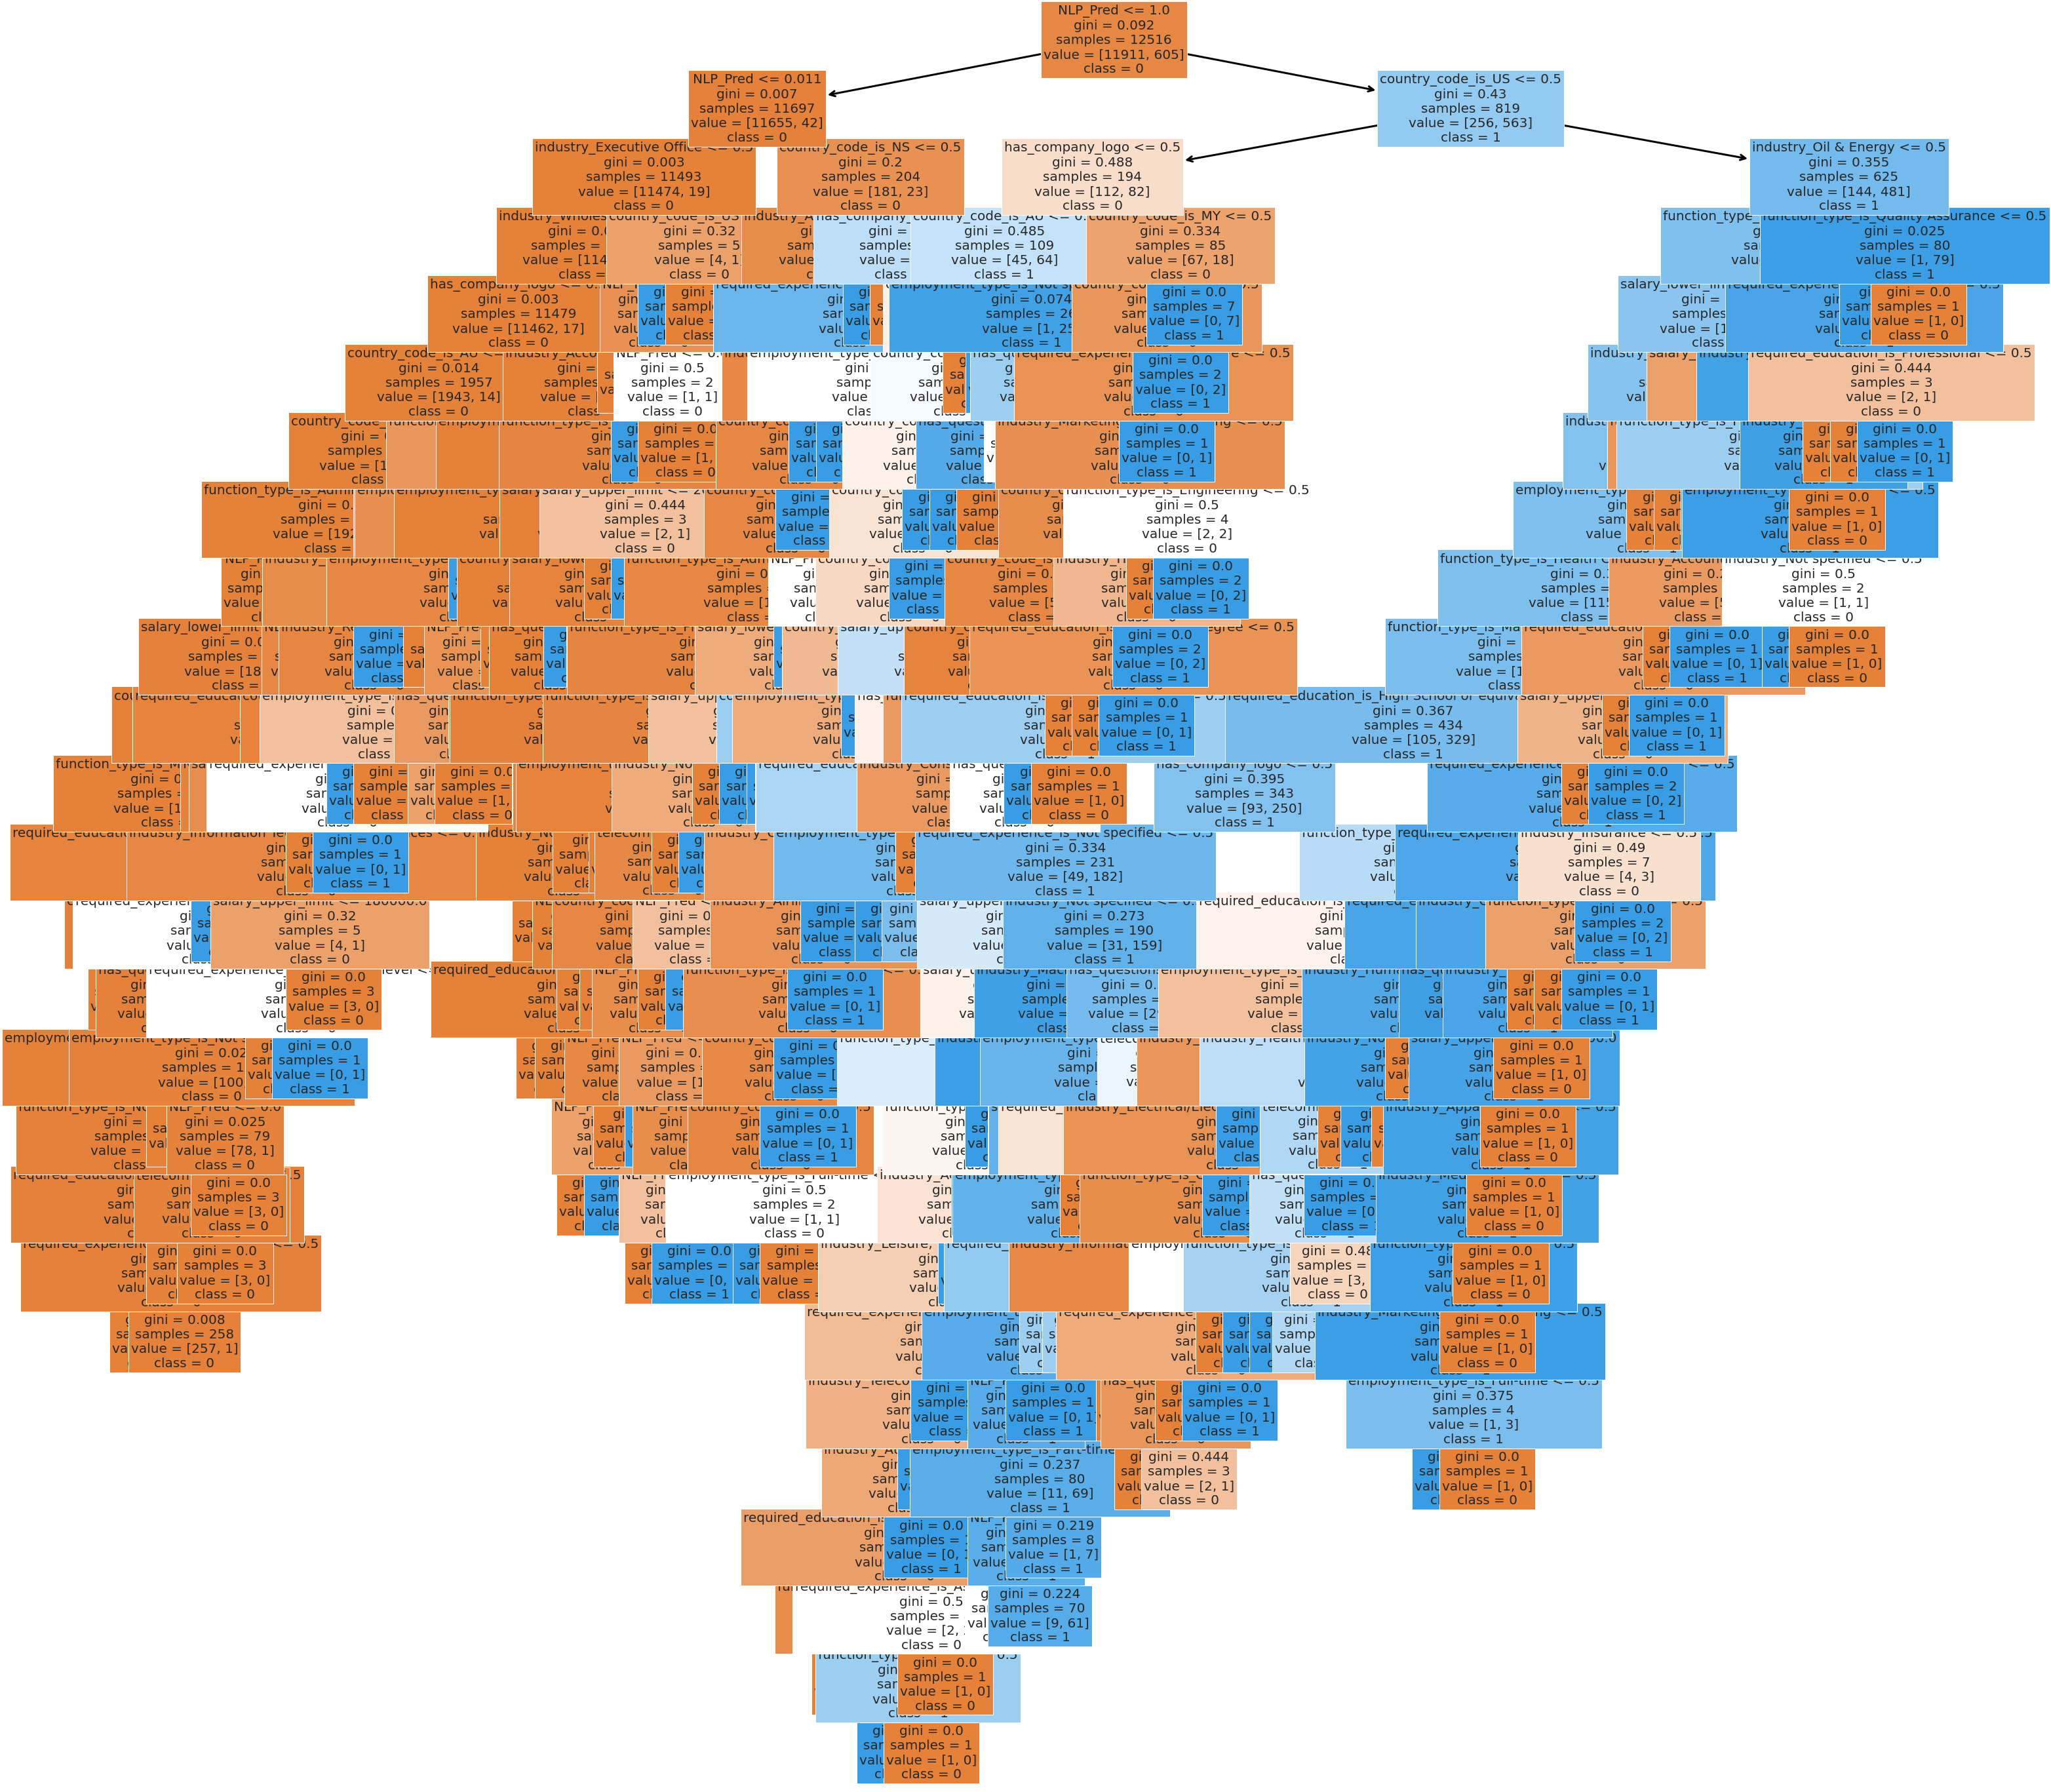

In [14]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(50, 50))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True,
          fontsize=20)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()